In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df= pd.read_csv(r"C:\Users\habib\OneDrive\المستندات\Graduation Project\GRAD-proj-DEPI\heart_disease_uci.csv")
print(display(df.head()))

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


None


In [3]:
df.shape

(920, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.drop(columns=['id', 'dataset'], inplace=True)

In [7]:
print(df.describe())


              age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000   
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000   
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  


In [8]:
print(df.describe(include='object'))

         sex            cp    fbs restecg  exang slope    thal
count    920           920    830     918    865   611     434
unique     2             4      2       3      2     3       3
top     Male  asymptomatic  False  normal  False  flat  normal
freq     726           496    692     551    528   345     196


In [9]:
null = df.isnull().sum()

ratio = (null / df.shape[0]) * 100
print(ratio)

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [10]:
df.drop(columns=['ca', 'thal', 'slope'], inplace=True)

In [12]:
cols_with_zero = ['trestbps', 'chol', 'thalch']
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

In [13]:
# Numeric columns → fill with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [14]:
# Categorical columns → fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
null = df.isnull().sum()

ratio = (null / df.shape[0]) * 100
print(ratio)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
num         0.0
dtype: float64


In [16]:
df['Heart_Disease'] = (df['num'] > 0).astype(int)

In [17]:
heart_counts = df['Heart_Disease'].value_counts().reset_index()
heart_counts.columns = ['Heart_Disease', 'Count']

fig = px.pie(
    heart_counts,
    names='Heart_Disease',
    values='Count',
    title='Heart Disease Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole=0.3
)
fig.show()

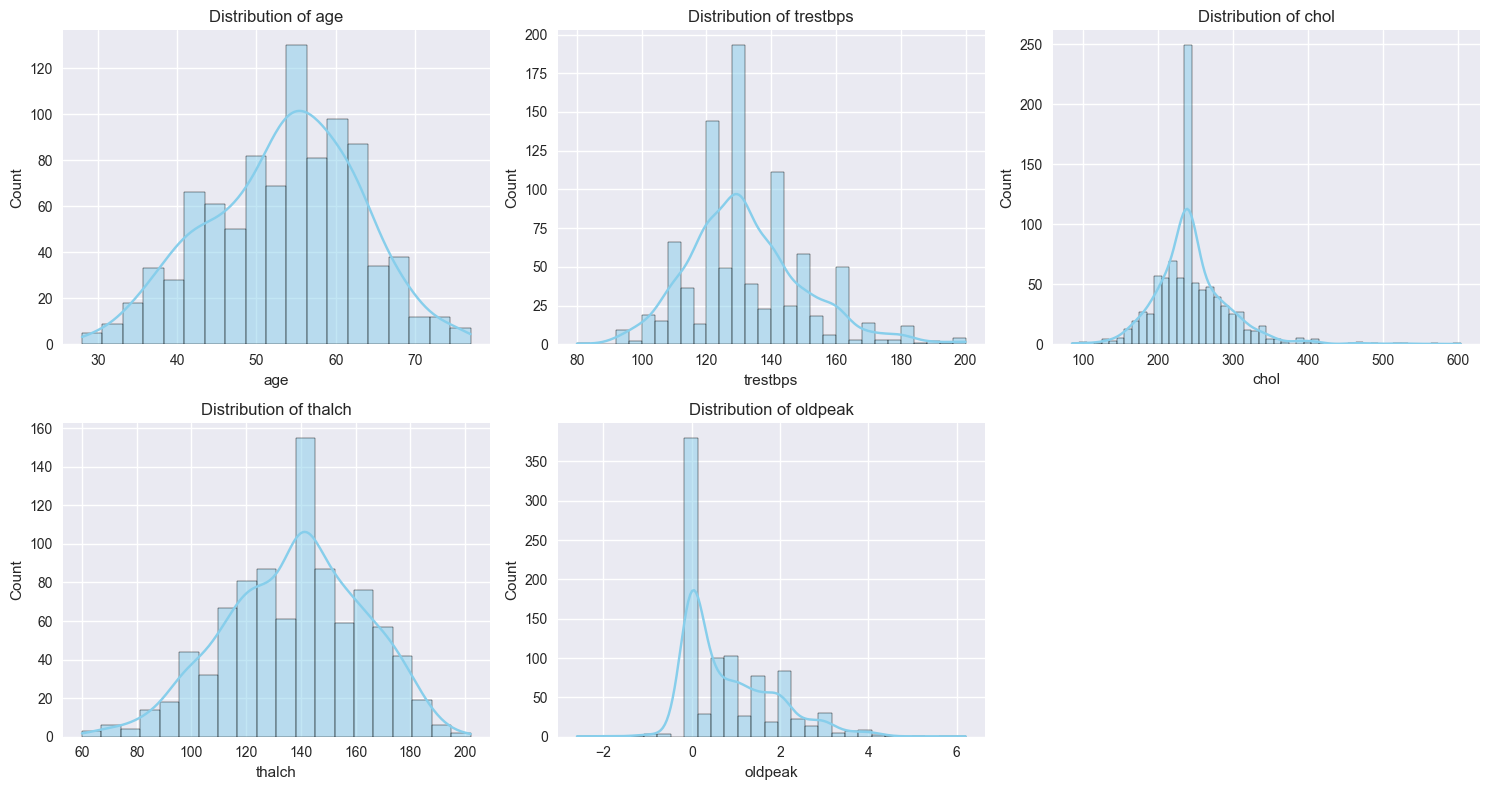

In [18]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [27]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']

fig = sp.make_subplots(rows=4, cols=2, subplot_titles=cat_cols)

for i, col in enumerate(cat_cols):
    row = (i // 2) + 1
    col_pos = (i % 2) + 1
    data = df[col].value_counts().reset_index()
    data.columns = [col, 'Count']
    
    bar = go.Bar(
        x=data[col].astype(str),
        y=data['Count'],
        name=col,
        marker=dict(color='rgba(93, 164, 214, 0.8)')
    )
    
    fig.add_trace(bar, row=row, col=col_pos)

fig.update_layout(
    height=1000,
    width=800,
    title_text='Categorical Features Distribution',
    showlegend=False,
    template='plotly_white'
)
fig.update_xaxes(tickangle=45)
fig.show()


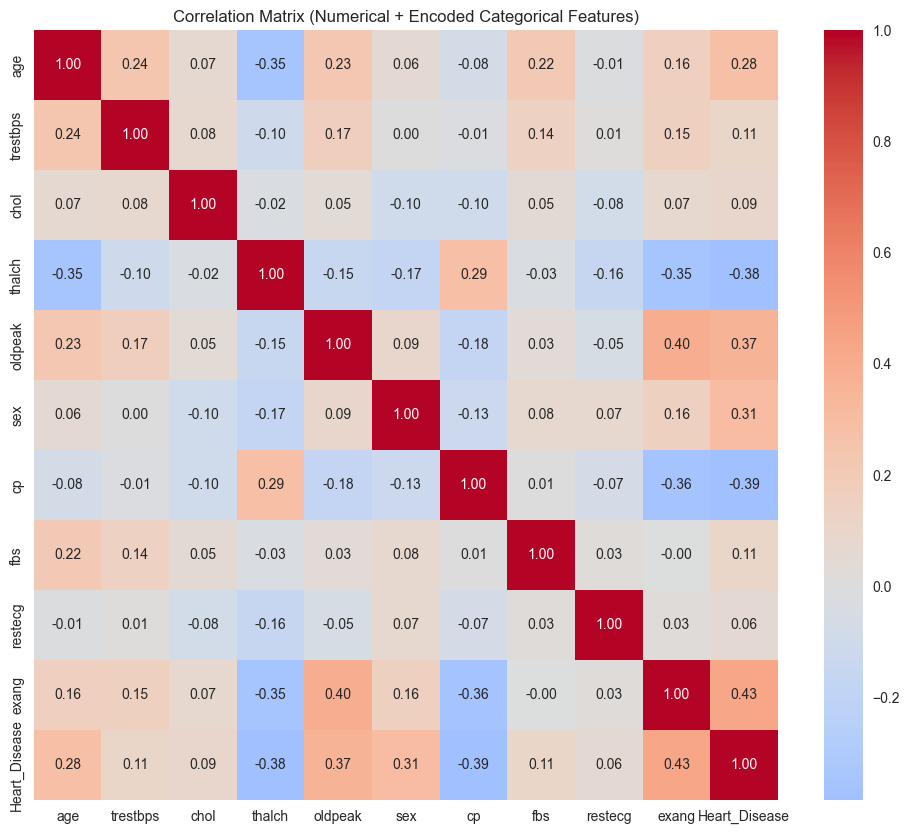

In [28]:
# Convert categorical features to numeric temporarily
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

corr = df_encoded[num_cols + cat_cols + ['Heart_Disease']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Numerical + Encoded Categorical Features)')
plt.show()

In [31]:
corr_with_target = corr['Heart_Disease'].sort_values(ascending=False)
print("Correlation with Heart Disease (Descending):")
print(corr_with_target)

Correlation with Heart Disease (Descending):
Heart_Disease    1.000000
exang            0.433605
oldpeak          0.366138
sex              0.307284
age              0.282700
trestbps         0.111305
fbs              0.108071
chol             0.089008
restecg          0.058783
thalch          -0.381864
cp              -0.385077
Name: Heart_Disease, dtype: float64
